In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# load an OGC GeoPackage containing the DC Crime 2017 point layer 
map_df = gpd.read_file("crime_2017.gpkg", layer = 'Crime_2017')

In [3]:
map_df.columns

Index(['CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK', 'XBLOCK',
       'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA', 'NEIGHBORHO', 'BLOCK_GROU',
       'CENSUS_TRA', 'VOTING_PRE', 'LATITUDE', 'LONGITUDE', 'BID',
       'START_DATE', 'END_DATE', 'OBJECTID', 'OFFENSE_CODE', 'geometry'],
      dtype='object')

Create a map showing all crimes that were commited using a gun in DC in 2017.  Require police district boundaries, title, source, and label for each police district.

In [4]:
gun = map_df[map_df.METHOD == 'GUN']

In [5]:
map_df1 = gpd.read_file("data/Police_Districts.shp")

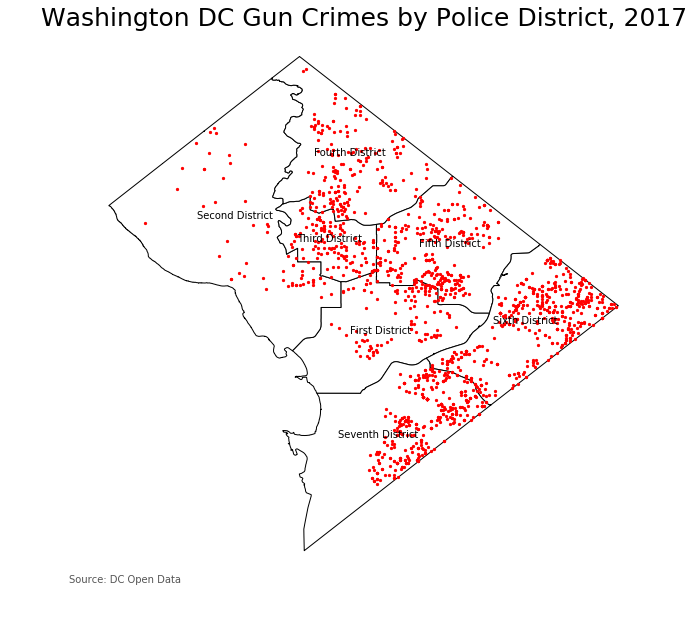

In [6]:
# create figure and axes for Matplotlib
base = map_df1.plot(color='white', edgecolor='black',figsize=(12, 10))
gun.plot(ax=base, marker='o', color='red', markersize=5);

base.axis('off')

# add a title
base.set_title('Washington DC Gun Crimes by Police District, 2017', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
base.annotate('Source: DC Open Data',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# add Police District labels
map_df1.apply(lambda x: base.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

confirm that the results from the spatial join in lab 2 were correct

In [7]:
join = gpd.sjoin(map_df1, map_df)

In [8]:
df = pd.DataFrame({'District':join['OBJECTID_left'],'count':np.ones(33069)})

In [9]:
df1 = df.groupby(['District']).sum()

In [10]:
df1

,count
District,
1,4776.0
2,5628.0
3,5964.0
4,4229.0
5,4914.0
6,4488.0
7,3070.0


run spatial join on gun offenses and calculate based on district encoding -- which is more accurate? why?

bring in shotspotter data -- either connect to API or machine learning....

In [9]:
map_df.OFFENSE.unique() 

array(['THEFT/OTHER', 'ROBBERY', 'THEFT F/AUTO',
       'ASSAULT W/DANGEROUS WEAPON', 'MOTOR VEHICLE THEFT', 'BURGLARY',
       'SEX ABUSE', 'HOMICIDE', 'ARSON'], dtype=object)

In [10]:
map_df.OFFENSE_CODE.unique()

array([1, 2, 4, 6, 3, 5, 9, 7, 8])

In [15]:
ash = map_df[(map_df.OFFENSE_CODE == 7)|(map_df.OFFENSE_CODE == 6)|(map_df.OFFENSE_CODE == 9)]

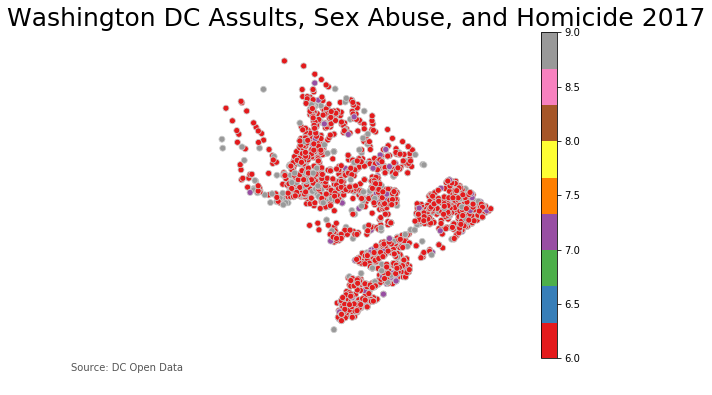

In [17]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'OFFENSE_CODE'

# set the range for the choropleth
vmin, vmax = 6, 9

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

ax.set_aspect('equal')

# create map
ash.plot(column=variable, cmap='Set1', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Washington DC Assults, Sex Abuse, and Homicide 2017', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: DC Open Data',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Set1', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
#fig.savefig('testmap.png', dpi=300)